## Section 1: Electric field of a point charge

Recall that for a point charge located at ${\bf r}_0$ the electric field at a point ${\bf r}$ is given by:

$$ {\bf E_{\rm point}}({\bf r}) =  k \frac{q}{|{\bf r}- \bf {r_0}|^3 }\cdot {({\bf r}- \bf {r}_0)} $$

Note that we can compute $\tilde{{\bf E}}_{\rm point}({\bf r})$ instead of ${\bf E_{\rm point}}({\bf r})$ to simplify calculations involving $k$ by substituting $k \rightarrow 1$:

$$ \tilde{{\bf E}}_{\rm point}({\bf r}) = {\bf E_{\rm point}}({\bf r}) / k =  \frac{q}{|{\bf r}- \bf {r_0}|^3 }\cdot {({\bf r}- \bf {r}_0)} $$

This means, that we calculate the electric field "in units of $k$". For convenience, we will omit the tilde for ${\bf E}$ in the following.

### Implementation of the electric field of a point charge

As usual we start with importing the standard libraries. 

In [ ]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

We re-use our function definition of the electric field of a point charge from the intro PiP:

In [ ]:
def E_point(charge,r0,r):  # function definition to compute the electric field for a point charge (in units of k)
                           # Input variables: charge: charge of point particle (real number), 
                           #                  r0: position of charge (3D vector), 
                           #                  r: position at which you want to evaluate E (3D vector)
                           # Output variable: electric field (3D vector) 

    dist=(r0[0]-r[0])**2+(r0[1]-r[1])**2+(r0[2]-r[2])**2  # computation of denominator in above formula
    dist=dist**(3/2)
    Ex=charge/dist*(r[0]-r0[0])                           # computation of electric field components
    Ey=charge/dist*(r[1]-r0[1])
    Ez=charge/dist*(r[2]-r0[2])
    return np.array([Ex,Ey,Ez])                           # return the electric field as a 3D vector (numpy array)

## Section 2: Calculating the electric field for a line charge directly by numerical integration

You have seen in class that the electric field for a thin uniformly charged rod with length $L$ can be calculated using an integral. We will assume that the line charge is located along the $z$ axis, thus 
the positions on this line are given by $z \, {\hat {\bf k}}$ with $\hat{{\bf k}}$ being the unit vector along the $z$ axis. The rod is centered at the origin. The electric field ${\bf E}_{\rm rod}({\bf r})$ at an arbitrary point ${\bf r}$ is then given by:

$$ {\bf E}_{\rm rod}({\bf r}) = \int_{-L/2}^{L/2} \frac{\lambda}{|z\, \hat{{\bf k}}- \bf {r}|^3 }\cdot {({\bf r}-  z\, \hat{\bf{k}})} \, dz \: ,$$

Where $\lambda$ is the charge density. The electric field for an infinite line charge is obtained by taking the limit $L \rightarrow \infty$.

We can approximate the integral as a simple sum by dividing the rod into $N$ segments:

$$ E_{\rm rod}{(\bf r}) \approx \sum_{i=1}^{N} \: \frac{\lambda \Delta z}{|z_i\, {\bf \hat{k}}- \bf {r}|^3 }\cdot {({\bf r}-  z_i\, \bf{k})} \: ,
$$

Where $z_i$ is the mid-point of the $i$-th line segment of length $\Delta z$. This approximation is useful since the above sum is discrete and can be implemented in Python via a ```for``` loop. By increasing the number of segments (of decreasing length) the numerical result will converge towards the analytical solution. 

We start with calculating the mid points along our rod. Make sure that you understand what is done. Then run the code and look at the output. Please discuss with your partner and ask if you have questions.

In [ ]:
#---------------------------INPUT-------------------------

L = 200                    # length of the rod
n_segments = 2001          # number of rod segments - should be an odd number! (why?)

#---------------------------------------------------------

L_segment = L/n_segments       # length of rod segments

start_z = -L/2. + L_segment/2.      # mid point of first line segment
end_z   =  L/2. - L_segment/2.      # mid point of last line segment

z = np.linspace(start_z,end_z,n_segments)   # computing the midpoints' positions of line segments

print("Positions of the midpoints of the rod segments: \n",z)

Remember that ```z``` is an array starting at ```z[0]``` and ending at  ```z[n_segments-1]```. The length between the points on the line is given by the variable ```L_segment```. We now want to calculate the electric field at a given location ```rr``` due to a uniform linear charge density on a rod described by the line.

<span style="color:red"> ***Try it yourself***: Below is a code that allows you to calculate the electric field of a charged rod. Make sure that you understand every step of the code. Use the code to calculate the electric field of a rod at ${\bf r} = (1, 0, 0)$ and ${\bf r} = (1, 0, -4)$ with $L =$ 200 and $L =$ 20, $\lambda =$ 1. </span>              

In [20]:
import numpy as np

def E_rod(charge,r0,r):  # function definition to compute the electric field for a point charge (in units of k)
                           # Input variables: charge: charge of point particle (real number), 
                           #                  r0: position of charge (3D vector), 
                           #                  r: position at which you want to evaluate E (3D vector)
                           # Output variable: electric field (3D vector) 

    dist=(r0[0]-r[0])**2+(r0[1]-r[1])**2+(r0[2]-r[2])**2  # computation of denominator in above formula
    dist=dist**(3/2)
    Ex=charge/dist*(r[0]-r0[0])                           # computation of electric field components
    Ey=charge/dist*(r[1]-r0[1])
    Ez=charge/dist*(r[2]-r0[2])
    return np.array([Ex,Ey,Ez])                           # return the electric field as a 3D vector (numpy array)

# Numerical Integration of electric field by midpoint formula

#---------------------------INPUT-------------------------

L = 200                              # length of the rod
n_segments = 2001                    # number of rod segments 
                                     # should be an odd number so that rod is centred at origin!

r_x =  1.0                           # input of location where you want to compute electric field
r_y =  0.0
r_z =  0.0
rr = np.array([r_x,r_y,r_z])     

charge_density = 1.0                 # input of charge density lambda

#---------------------------------------------------------

L_segment = L/n_segments                # length of line segments

start_z = -L/2. + L_segment/2.          # mid point of first line segment
end_z   =  L/2. - L_segment/2.          # mid point of last line segment

z = np.linspace(start_z,end_z,n_segments)  # computing the z positions of midpoints on line segments

charge = charge_density * L_segment     # compute charge on an individual line segment 

sum = np.array([0,0,0])                 # initialisation of the electric field vector

for ii in range(0,len(z)):              # Loop over all line segments
    r0 = np.array([0,0,z[ii]])          # Define the position of the mid point of line segment
    sum = sum + E_rod(charge,r0,rr)   # Sum the electric field contributions for every line segment
    
print("The electric field at $r$ = (",r_x,",",r_y,",",r_z,") for L =",L,"is: ",sum)   #  Print out the electric field vector

The electric field at $r$ = ( 1.0 , 0.0 , 0.0 ) for L = 200 is:  [1.99990001e+00 0.00000000e+00 1.93315450e-15]


Your results should be: 

1) L = 200, r = (1,0,0):  E = (1.99990001e+00 0.00000000e+00 1.93315450e-15)
         
2) L = 200, r = (1,0,-4): E = (1.99989953e+00  0.00000000e+00 -8.01161224e-04)

3) L = 20,  r = (1,0,0):  E = (1.99007438e+00 0.00000000e+00 4.30699313e-17)

4) L = 20,  r = (1,0,-4): E = (1.98385263  0.         -0.0931519)
 

###  <span style="color:red"> Task 1: </span>

<span style="color:red"> (a) Complete the function definition in the code cell below for a function called ```efield_rod``` which has the linear charge density, the location where the electric field is calculated, the length of the rod and the number of line segments as input variables. Output is the electric field of a rod.</span>
<span style="color:red"> (b) Check that you get the same result from your function as you got above.</span>

In [60]:
import numpy as np

def efield_rod(charge_density, r, L, n):  # INPUT: charge density 
                                          #        location of electric field r
                                          #        length of rod L
                                          #        number of segments n
                
    
    L_segment = L/n                       # length of line segments

    start_z = -L/2. + L_segment/2.        # mid point of first line segment
    end_z   =  L/2. - L_segment/2.        # mid point of last line segment
    
     
    z = np.linspace(start_z,end_z,n)      # computing the z positions of midpoints on line segments  
    
    # COMPLETE THE CODE HERE (E_point function)

    dist=(z[0]-r[0])**2+(z[1]-r[1])**2+(z[2]-r[2])**2  # computation of denominator in above formula
    dist=dist**(3/2)
    Ex=(charge_density * z[0])/dist*(r[0]-z[0])                           # computation of electric field components
    Ey=(charge_density * z[0])*(r[1]-z[1])
    Ez=(charge_density * z[0])*(r[2]-z[2])
    return np.array([Ex,Ey,Ez])                           # return the electric field as a 3D vector (numpy array)

    for ii in range(0,len(z)):              # Loop over all line segments
        r0 = np.array([0,0,z[ii]])          # Define the position of the mid point of line segment
        sum = sum + efield_rod(charge_density, r, L, n)   # Sum the electric field contributions for every line segment

# Numerical Integration of electric field by midpoint formula

# return sum

print(efield_rod(1, [1,0,0], 2, 3))
print(efield_rod(1, [1,0,0], 20, 3))
print(efield_rod(1, [1,0,0], 200, 3))
print(efield_rod(1, [1,0,0], 2000, 3))
print("\n")
print(efield_rod(1, [1,0,-4], 2, 3))
print(efield_rod(1, [1,0,-4], 20, 3))
print(efield_rod(1, [1,0,-4], 200, 3))
print(efield_rod(1, [1,0,-4], 2000, 3))
print("\n")
print(efield_rod(1, [1,0,0], 2000, 30))
print(efield_rod(1, [1,0,0], 2000, 300))
print(efield_rod(1, [1,0,0], 2000, 3000))
print(efield_rod(1, [1,0,0], 2000, 30000))

[-0.19209863 -0.          0.44444444]
[-0.04873663 -0.         44.44444444]
[-5.26309300e-03 -0.00000000e+00  4.44444444e+03]
[-5.29931892e-04 -0.00000000e+00  4.44444444e+05]


[-0.0091313  -0.          3.11111111]
[-2.25487205e-02 -0.00000000e+00  7.11111111e+01]
[-4.81661219e-03 -0.00000000e+00  4.71111111e+03]
[-5.25190995e-04 -0.00000000e+00  4.47111111e+05]


[-2.45300275e-04 -8.70000000e+05 -8.05555556e+05]
[-1.97009216e-04 -9.86700000e+05 -9.80055556e+05]
[-1.92899460e-04 -9.98667000e+05 -9.98000556e+05]
[-1.92494848e-04 -9.99866670e+05 -9.99800006e+05]


###  <span style="color:red"> Task 3:</span>

<span style="color:red"> (a) Complete the code in the cell given below to make a log-log plot of the $x$ component of the electric field of a rod as a function of the distance from the line charge $(x \in [0.5, 5.0]$) for a long rod, e.g., $L=200$. </span>

<span style="color:red">(b) Explain why you should find a straight line in the plot. </span>
    
<span style="color:red">(c) What does the slope of this line tells you? </span>
    

<span style="color:red">(d) What dependence on the radial distance $x$ do you expect? </span>
    
<span style="color:red">(e) Can you confirm that the observed $x$ dependence is what you have expected?  </span>

In [72]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

xarg = np.arange(0.5,5.0,0.1)       # x component of position where electric field is computed

value = np.zeros(len(xarg))         # array to store electric field values

# Calculate the values of the electric field here,

def efield_rod(charge_density, r, L, n):  # INPUT: charge density 
                                          #        location of electric field r
                                          #        length of rod L
                                          #        number of segments n
                
    
    L_segment = L/n                       # length of line segments

    start_z = -L/2. + L_segment/2.        # mid point of first line segment
    end_z   =  L/2. - L_segment/2.        # mid point of last line segment
    
     
    z = np.linspace(start_z,end_z,n)      # computing the z positions of midpoints on line segments  
    
    # COMPLETE THE CODE HERE

    dist=(z[0]-r[0])**2+(z[1]-r[1])**2+(z[2]-r[2])**2  # computation of denominator in above formula
    dist=dist**(3/2)
    Ex=(charge_density * z[0])/dist*(r[0]-z[0])                           # computation of electric field components
    Ey=(charge_density * z[0])*(r[1]-z[1])
    Ez=(charge_density * z[0])*(r[2]-z[2])
    return np.array([Ex,Ey,Ez])                           # return the electric field as a 3D vector (numpy array)

    for ii in range(0,len(z)):              # Loop over all line segments
        r0 = np.array([0,0,z[ii]])          # Define the position of the mid point of line segment
        sum = sum + efield_rod(charge_density, r, L, n)   # Sum the electric field contributions for every line segment

def range_with_floats(start, stop, step):   # edureka.co/community/73745/typeerror-float-object-cannot-be-interpreted-as-an-integer
    while stop > start:
        yield start
        start += step
               
for i in range_with_floats(0.5,5.0,0.1):
    value = efield_rod(1, i, 200, 3)
        
print(value)

x = value
y = [0.5,5.0,0.1]

plt.plot(np.log(x), np.log(y))
# plt.plot(x, y)

# remember that a plot of y(x) is done by plt.plot(x,y) and the logarithm function ln(x) is implemented as np.log(x)
plt.title('')         # Don't forget to label your plot. 
plt.xlabel('Electric field (N/C)')        # commands needed: plt.title('TITLE'); plt.xlabel('LABEL FOR X AXIS'); plt.ylabel('LABEL FOR Y AXIS'))
plt.ylabel('Distance (m)')
# you can also use plt.grid(True) to display grid lines

TypeError: 'int' object is not subscriptable

###  <span style="color:red"> Task 4:</span>

<span style="color:red"> (a) Make a log-log plot of the $x$ component of the electric field of a rod as a function of the radial distance with $r \gg L$; e.g. choose $x \in [100., 200.]$ and $L=2$. </span>
    
<span style="color:red">(b) What dependence on the radial distance given by $x$ do you expect now? </span>
    
<span style="color:red">(c) Does your log-log plot confirms this?  </span>

In [68]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

xarg = np.arange(100,200,1)       # x component of position where electric field is computed

value = np.zeros(len(xarg))         # array to store electric field values

# Calculate the values of the electric field here,

def efield_rod(charge_density, r, L, n):  # INPUT: charge density 
                                          #        location of electric field r
                                          #        length of rod L
                                          #        number of segments n
                
    
    L_segment = L/n                       # length of line segments

    start_z = -L/2. + L_segment/2.        # mid point of first line segment
    end_z   =  L/2. - L_segment/2.        # mid point of last line segment
    
     
    z = np.linspace(start_z,end_z,n)      # computing the z positions of midpoints on line segments  
    
    # COMPLETE THE CODE HERE

    dist=(z[0]-r[0])**2+(z[1]-r[1])**2+(z[2]-r[2])**2  # computation of denominator in above formula
    dist=dist**(3/2)
    Ex=(charge_density * z[0])/dist*(r[0]-z[0])                           # computation of electric field components
    Ey=(charge_density * z[0])*(r[1]-z[1])
    Ez=(charge_density * z[0])*(r[2]-z[2])
    return np.array([Ex,Ey,Ez])                           # return the electric field as a 3D vector (numpy array)

    for ii in range(0,len(z)):              # Loop over all line segments
        r0 = np.array([0,0,z[ii]])          # Define the position of the mid point of line segment
        sum = sum + efield_rod(charge_density, r, L, n)   # Sum the electric field contributions for every line segment
               
for i in range(100,200,1):
    value = efield_rod(1, i, 200, 3)
        
print(value)

x = value
y = [100,200,1]

plt.plot(np.log(x), np.log(y))
# plt.plot(x, y)

# remember that a plot of y(x) is done by plt.plot(x,y) and the logarithm function ln(x) is implemented as np.log(x)
plt.title('Log-log plot for electric field of charged rod vs radial distance')         # Don't forget to label your plot. 
plt.xlabel('Electric field (N/C)')        # commands needed: plt.title('TITLE'); plt.xlabel('LABEL FOR X AXIS'); plt.ylabel('LABEL FOR Y AXIS'))
plt.ylabel('Distance (m)')
# you can also use plt.grid(True) to display grid lines

TypeError: 'int' object is not subscriptable

## Section 3: Integration using in-built integration routines

In addition to the method above, we can also use one of Python's in-built integration routines to numerically evaluate the electric field of the rod. The routine we are using is found in the package "integrate", which is part of the ```scipy``` library. The documentation of this package can be found at https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html.

In [ ]:
import scipy.integrate as integrate  # import Python's integration package from the scipy library

We choose the simplest of the in-built functions called ```integrate.quad``` to calculate integrals in the form of$\int_{a}^b f(x; p1, p2, \dots) \; dx $. The function takes 4 arguments. The first argument is the name of the function $f$ to be integrated, the next two are the limits of integration $a$ and $b$, and the final argument contains a list of additional parameters $p1, p2, \dots$. An integral of the form $\int_{a}^b f(x; p1, p2) \; dx $ can thus be implemented as ```integrate.quad(f,a,b,args=(p1,p2))```.


Let's look at the integral we need to compute to get the electric field of a charged rod:
$$ {\bf E}({\bf r}) = \int_{-L/2}^{L/2} \frac{\lambda}{|z\, \hat{{\bf k}}- {\bf r}|^3} \cdot {({\bf r}-  z\, \hat{\bf{k}})} \, dz = \int_{-L/2}^{L/2}{\bf I}(z) \, dz$$

In order to use the in-built integration routine, we will need to write a Python function for the integrand ${\bf I}(z)$. The scipy ```integrate``` functions also require that the function $f$ returns a real number. Therefore, we have to split the integrand up into its $x$, $y$ and $z$ components; $I_x(z)$, $I_y(z)$ and $I_z(z)$.

###  <span style="color:red"> Task 5:
    
<span style="color:red"> Write down expressions for $I_x(z)$, $I_y(z)$ and $I_z(z)$ for a charged rod of length $L$ located along the $z$ axis. </span>

In [70]:
import scipy.integrate as integrate
from scipy.integrate import quad

z = 3         # number of segements
L = 200
charge_density = 1

r_x = 0.0         # x-component distance between E origin and probe charge
r_y = 0.0         # y-component distance between E origin and probe charge
r_z = 0.0         # y-component distance between E origin and probe charge

# I_x(z)
def integrand_x(charge_density, z, r_x):
    return (charge_density/((z-r_x)**3))*(r_x-z)
I_x = quad(integrand_x, -L/2, L/2, args=(r_x, z))

# I_y(z)
def integrand_y(charge_density, z, r_y):   
    return (charge_density/((z-r_y)**3))*(r_y-z)
I_y = quad(integrand_y, -L/2, L/2, args=(r_y, z))

# I_z(z)
def integrand_z(charge_density, z, r_z):
    return (charge_density/((z-r_z)**3))*(r_z-z)
I_z = quad(integrand_z, -L/2, L/2, args=(r_z, z))


print(I_x, I_y, I_z)

(0.0, 1.2289822268352578e-11) (0.0, 1.2289822268352578e-11) (0.0, 1.2289822268352578e-11)


Enter your expressions here ... (Hint: click on one of the cells containing explanations with integral formulae above and press <kbd> return </kbd> to see how you can enter integrals in the markdown cells)

def integrand_x(charge_density, z, r_x):

    return (charge_density/((z-r_x)**3))*(r_x-z)

I_x = quad(integrand_x, -L/2, L/2, args=(r_x, z))

def integrand_y(charge_density, z, r_y):   

    return (charge_density/((z-r_y)**3))*(r_y-z)
    
I_y = quad(integrand_y, -L/2, L/2, args=(r_y, z))

def integrand_z(charge_density, z, r_z):

    return (charge_density/((z-r_z)**3))*(r_z-z)
    
I_z = quad(integrand_z, -L/2, L/2, args=(r_z, z))

Below is the implementation of the function definitions for each electric field component of a point charge, depending only on $z$ and the parameters ```charge_density``` and the position ```r``` at which we want to compute the electric field.

In [ ]:
#definition for components of electric field - dependence on z only to use numerical integration routine from scipy

def Ex_point(zz,charge_density,r):    
    Ex = E_point(charge_density,[0,0,zz],r)[0] 
    return Ex

def Ey_point(zz,charge_density,r):
    Ey = E_point(charge_density,[0,0,zz],r)[1] 
    return Ey

def Ez_point(zz,charge_density,r):
    Ez = E_point(charge_density,[0,0,zz],r)[2] 
    return Ez

In [ ]:
Ez_point(1,1,np.array([1,0,-4]))

We can now use the in-built function ```integrate.quad``` to perform the integration. The function to be integrated is the electric field component for a point charge, the integration limits are given by $\pm \frac{L}{2}$ and the parameter list contains the charge and the position at which we calculate the electric field of the rod.

In [ ]:
#INPUT
L = 10  # length of the rod
#L = np.infty    #with the in-built integration routine you can use limits of infinity - try it

charge_density = 1
pos = np.array([1,0,-4])

Ex_rod = integrate.quad(Ex_point, -L/2, L/2, args = (charge_density, pos))
print(Ex_rod)
Ey_rod = integrate.quad(Ey_point, -L/2, L/2, args = (charge_density, pos))
print(Ey_rod) 
Ez_rod = integrate.quad(Ez_point, -L/2, L/2, args = (charge_density, pos))
print(Ez_rod)

Note that integrate.quad returns a list containing two numbers. The first one is the answer while the second number is an error estimate. 

In [ ]:
#Making a function
def E_rod_integrate(charge_density, pos, L):
    Ex_rod = integrate.quad(Ex_point, -L/2, L/2, args = (charge_density, pos))
    Ey_rod = integrate.quad(Ey_point, -L/2, L/2, args = (charge_density, pos))
    Ez_rod = integrate.quad(Ez_point, -L/2, L/2, args = (charge_density, pos))
    
    E_rod = np.array([Ex_rod[0],Ey_rod[0],Ez_rod[0]])
    error = np.array([Ex_rod[1],Ey_rod[1],Ez_rod[1]])
    
    return E_rod,error

result = E_rod_integrate(charge_density,pos, 20) 
print("E field: ", result[0])
print("Integration errors: ", result[1])

###  <span style="color:red"> Task 6:
    
<span style="color:red"> Use the new function to compute the electric field again at positions ${\bf r}_1 = (1,0,0) $ and ${\bf r}_2 = (1,0,-4)$ for a uniformly charged rod of  $L$ = 2, 20, 200, 2000 and 20000 and for an infinite length (np.infty) for a linear charge density of 1. Compare your results with those from Task 2. </span>

In [94]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

value_r1 = np.zeros(len(xarg))
value_r2 = np.zeros(len(xarg))

def Ex_point(zz,charge_density,r):    
    Ex = E_point(charge_density,[0,0,zz],r)[0] 
    return Ex

def Ey_point(zz,charge_density,r):
    Ey = E_point(charge_density,[0,0,zz],r)[1] 
    return Ey

def Ez_point(zz,charge_density,r):
    Ez = E_point(charge_density,[0,0,zz],r)[2] 
    return Ez

charge_density = 1
pos = np.array([1,0,0])

Ex_rod = integrate.quad(Ex_point, -L/2, L/2, args = (charge_density, pos))
#print(Ex_rod)
Ey_rod = integrate.quad(Ey_point, -L/2, L/2, args = (charge_density, pos))
#print(Ey_rod) 
Ez_rod = integrate.quad(Ez_point, -L/2, L/2, args = (charge_density, pos))
#print(Ez_rod)

def E_rod_integrate(charge_density, pos, L):
    Ex_rod = integrate.quad(Ex_point, -L/2, L/2, args = (charge_density, pos))
    Ey_rod = integrate.quad(Ey_point, -L/2, L/2, args = (charge_density, pos))
    Ez_rod = integrate.quad(Ez_point, -L/2, L/2, args = (charge_density, pos))
    
    E_rod = np.array([Ex_rod[0],Ey_rod[0],Ez_rod[0]])
    error = np.array([Ex_rod[1],Ey_rod[1],Ez_rod[1]])
    
    return E_rod,error

for L1 in [2, 20, 200, 2000, 20000]:
    value_r1 = E_rod_integrate(charge_density,pos, L1)

for L2 in [2, 20, 200, 2000, 20000]:
    pos = np.array([1, 0, -4])
    value_r1 = E_rod_integrate(charge_density,pos, L2)
    
print(value_r1)
print(value_r2)

#print(E_rod_integrate(charge_density,pos, 2))
#print(E_rod_integrate(charge_density,pos, 20)
#print(E_rod_integrate(charge_density,pos, 200))
#print(E_rod_integrate(charge_density,pos, 2000))
#print(E_rod_integrate(charge_density,pos, 20000))

#plt.plot(np.log(xarg),np.log(elec))        #field should fall off as 1/r so a log-log plot will be a straight line.
#plt.plot(np.log(xarg),np.log(value),'r+') # comparison with results from own integration routine
#plt.title('Log-log plot for electric field of charged rod vs radial distance')
#plt.xlabel('radial distance') 
#plt.ylabel('$E_{rod}$') 
#plt.show

SyntaxError: invalid syntax (<ipython-input-94-e936ee40d0b4>, line 43)

Finally let's make again a log-log plot of the electric field of an infinite line against radial distance. And compare with the results from before (Task 3), shown by red crosses (remove the comment line in front of the plot command for this). You might want to run the code cell for the plot of task 3 again to make sure that you not have overwritten the array ```value``` with something else in the meantime.

<IPython.core.display.Javascript object>


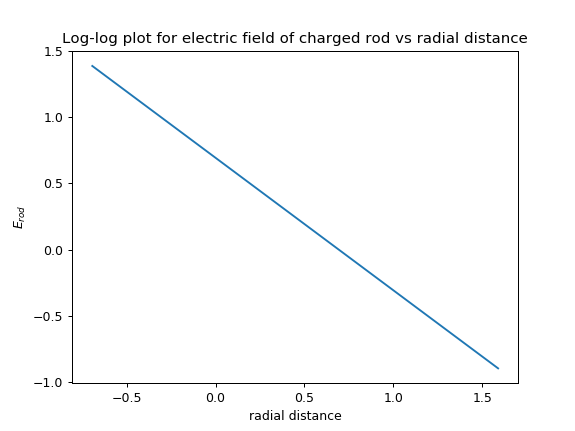

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log


<function matplotlib.pyplot.show>

In [78]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

def Ex_point(zz,charge_density,r):    
    Ex = E_point(charge_density,[0,0,zz],r)[0] 
    return Ex

############################

xarg = np.arange(0.5,5.,0.1)       # x component of position where electric field is computed
elec = np.zeros(len(xarg))

for ii in range(len(xarg)):
    elec[ii] = integrate.quad(Ex_point,-np.infty,np.infty,args=(charge_density,np.array([xarg[ii],0,0])))[0]

plt.figure(2)
plt.plot(np.log(xarg),np.log(elec))        #field should fall off as 1/r so a log-log plot will be a straight line.
#plt.plot(np.log(xarg),np.log(value),'r+') # comparison with results from own integration routine
plt.title('Log-log plot for electric field of charged rod vs radial distance')
plt.xlabel('radial distance') 
plt.ylabel('$E_{rod}$') 
plt.show